# prédiction des précipitation dans la ville de bafoussam à l'Ouest Cameroun
<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Donneés</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation des librairies</a></span></li></ul></li><li><span><a href="#Read-and-explore-data" data-toc-modified-id="Read-and-explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lire et explorer les données</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prétraitement des données</a></span><ul class="toc-item"><li><span><a href="#Rename-columns" data-toc-modified-id="Rename-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>modifier les colonnes</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>rechercher les valeurs manquante</a></span></li><li><span><a href="#Replace-outliers" data-toc-modified-id="Replace-outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Remplacer les valeurs aberrantes</a></span></li><li><span><a href="#Split-the-dataset-into-train-and-test-data" data-toc-modified-id="Split-the-dataset-into-train-and-test-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Diviser l'ensemble de données en données d'entraînement et de test</a></span></li><li><span><a href="#Split-the-target-variable-and-dependent-variables" data-toc-modified-id="Split-the-target-variable-and-dependent-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Diviser la variable cible et les variables dépendantes</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Transformation des données</a></span></li><li><span><a href="#Create-a-3D-Input-Dataset" data-toc-modified-id="Create-a-3D-Input-Dataset-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Create a 3D Input Dataset</a></span></li></ul></li><li><span><a href="#Create-BiLSTM,-LSTM-and-GRU-model" data-toc-modified-id="Create-BiLSTM,-LSTM-and-GRU-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Créer un modèle BiLSTM, LSTM et GRU</a></span><ul class="toc-item"><li><span><a href="#Fit-the-models" data-toc-modified-id="Fit-the-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Adapter les modèles</a></span><ul class="toc-item"><li><span><a href="#Plot-train-loss-vs-validation-loss" data-toc-modified-id="Plot-train-loss-vs-validation-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Perte de train vs perte de validation</a></span></li></ul></li><li><span><a href="#Inverse-target-variable-for-train-and-test-data" data-toc-modified-id="Inverse-target-variable-for-train-and-test-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Variable cible inverse pour les données d'entraînement et de test</a></span></li></ul></li><li><span><a href="#Make-prediction-using-BiLSTM,-LSTM-and-GRU" data-toc-modified-id="Make-prediction-using-BiLSTM,-LSTM-and-GRU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Faire des prédictions en utilisant BiLSTM, LSTM et GRU</a></span><ul class="toc-item"><li><span><a href="#Plot-true-future-vs-prediction" data-toc-modified-id="Plot-true-future-vs-prediction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>courbe des valeurs futur réel vs valeurs prédictes</a></span></li><li><span><a href="#Calculate-RMSE-and-MAE" data-toc-modified-id="Calculate-RMSE-and-MAE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculer RMSE et MAE</a></span></li></ul></li><li><span><a href="#Forecast-water-consumption-in-10-years" data-toc-modified-id="Forecast-water-consumption-in-10-years-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecast Consommation de précipitations en 10 ans</a></span></li></ul></div>

# Introduction
Dans ce notebook, je compare trois réseaux neuronaux récurrents couramment utilisés : Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU) et Bidirectionnel LSTM (BiLSTM) en fonction de leurs performances en matière de prédiction de la des orécipitation sous l'impact du changement climatique. Ensuite, j'utilise le meilleur modèle pour prévoir la consommation d'eau urbaine pour les 10 prochaines années.

## Dataset
La ville de Baffousam au Cameroun, a été choisie comme site d'étude. La ville fait partie de la région l'Ouest du Cameroun dans la memoa

Pour ce projet, les données sur la **précipitation** sont obtenues du 01/09/2013 au 30/12/2023. Pour la même période, la **température**, la **humidité**, le **Rayonnement solaire** et les **Vitesse et direction du vent** sont collectées. Les mesures de ces variables climatiques ont été réalisées par [l'API de la NASA].

## Import libraries

In [22]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [23]:
# Définir une graine aléatoire pour la reproductibilité
tf.random.set_seed(1234)

# Lire et explorer les données
Lorsque j'importe les données à partir d'un fichier CSV, je m'assure que la colonne **Date** a le format *DateTime* correct en **parse_dates = ['Date']**.
Lorsque je travaille avec la date et l'heure, cela devient beaucoup plus facile si je définis la colonne **Date** comme index du dataframe.

In [24]:
file = 'climat.csv'
df = pd.read_csv(file, sep=',')
df.head(10)

,YEAR,MO,DY,WS2M,WD2M,T2M,GWETTOP,PRECTOTCORR,ALLSKY_SFC_PAR_TOT
0,2013,1,1,1.24,58.31,23.40,0.56,0.06,109.10
1,2013,1,2,1.41,49.75,22.98,0.56,0.02,115.24
2,2013,1,3,1.48,67.56,22.97,0.55,0.00,118.47
3,2013,1,4,1.26,102.69,23.21,0.55,0.00,99.50
4,2013,1,5,0.93,249.50,23.38,0.55,0.02,109.19
5,2013,1,6,0.98,306.19,23.32,0.55,0.58,101.45
6,2013,1,7,0.95,125.31,24.09,0.55,0.61,97.85
7,2013,1,8,1.15,26.88,24.86,0.55,0.16,96.95
8,2013,1,9,1.55,60.81,24.03,0.54,0.00,116.49
9,2013,1,10,1.48,112.00,23.87,0.53,0.00,113.23


In [25]:
# statistiques descriptives
df.describe()

,YEAR,MO,DY,WS2M,WD2M,T2M,GWETTOP,PRECTOTCORR,ALLSKY_SFC_PAR_TOT
count,4017.000000,4017.000000,4017.00000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000
mean,2018.000000,6.523774,15.72716,0.917404,173.356871,23.903079,0.665721,4.036527,92.499925
std,3.162199,3.448901,8.80014,0.272967,70.914221,1.316113,0.101981,6.228387,19.676253
min,2013.000000,1.000000,1.00000,0.350000,21.440000,19.810000,0.350000,0.000000,24.160000
25%,2015.000000,4.000000,8.00000,0.720000,117.310000,23.030000,0.590000,0.250000,78.450000
50%,2018.000000,7.000000,16.00000,0.880000,174.060000,23.710000,0.680000,2.170000,94.850000
75%,2021.000000,10.000000,23.00000,1.060000,232.880000,24.590000,0.740000,5.260000,107.740000
max,2023.000000,12.000000,31.00000,2.230000,326.190000,31.560000,0.940000,70.680000,137.430000


In [26]:
# Renommer les colonnes YEAR, MO et DY en year, month et day
df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}, inplace=True)

# Fusionner les variables year, month et day en une seule variable datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
# Supprimer les colonnes year, month et day
df.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [27]:
#metter la colonne date en index et en premier colonne
df.set_index('date', inplace=True)
df.head(10)

,WS2M,WD2M,T2M,GWETTOP,PRECTOTCORR,ALLSKY_SFC_PAR_TOT
date,,,,,,
2013-01-01,1.24,58.31,23.40,0.56,0.06,109.10
2013-01-02,1.41,49.75,22.98,0.56,0.02,115.24
2013-01-03,1.48,67.56,22.97,0.55,0.00,118.47
2013-01-04,1.26,102.69,23.21,0.55,0.00,99.50
2013-01-05,0.93,249.50,23.38,0.55,0.02,109.19
2013-01-06,0.98,306.19,23.32,0.55,0.58,101.45
2013-01-07,0.95,125.31,24.09,0.55,0.61,97.85
2013-01-08,1.15,26.88,24.86,0.55,0.16,96.95
2013-01-09,1.55,60.81,24.03,0.54,0.00,116.49


In [28]:
# taille total des données
df.shape

(4017, 6)

**Traçons le graphe des séries chronologiques**

Traçons toutes la variables.

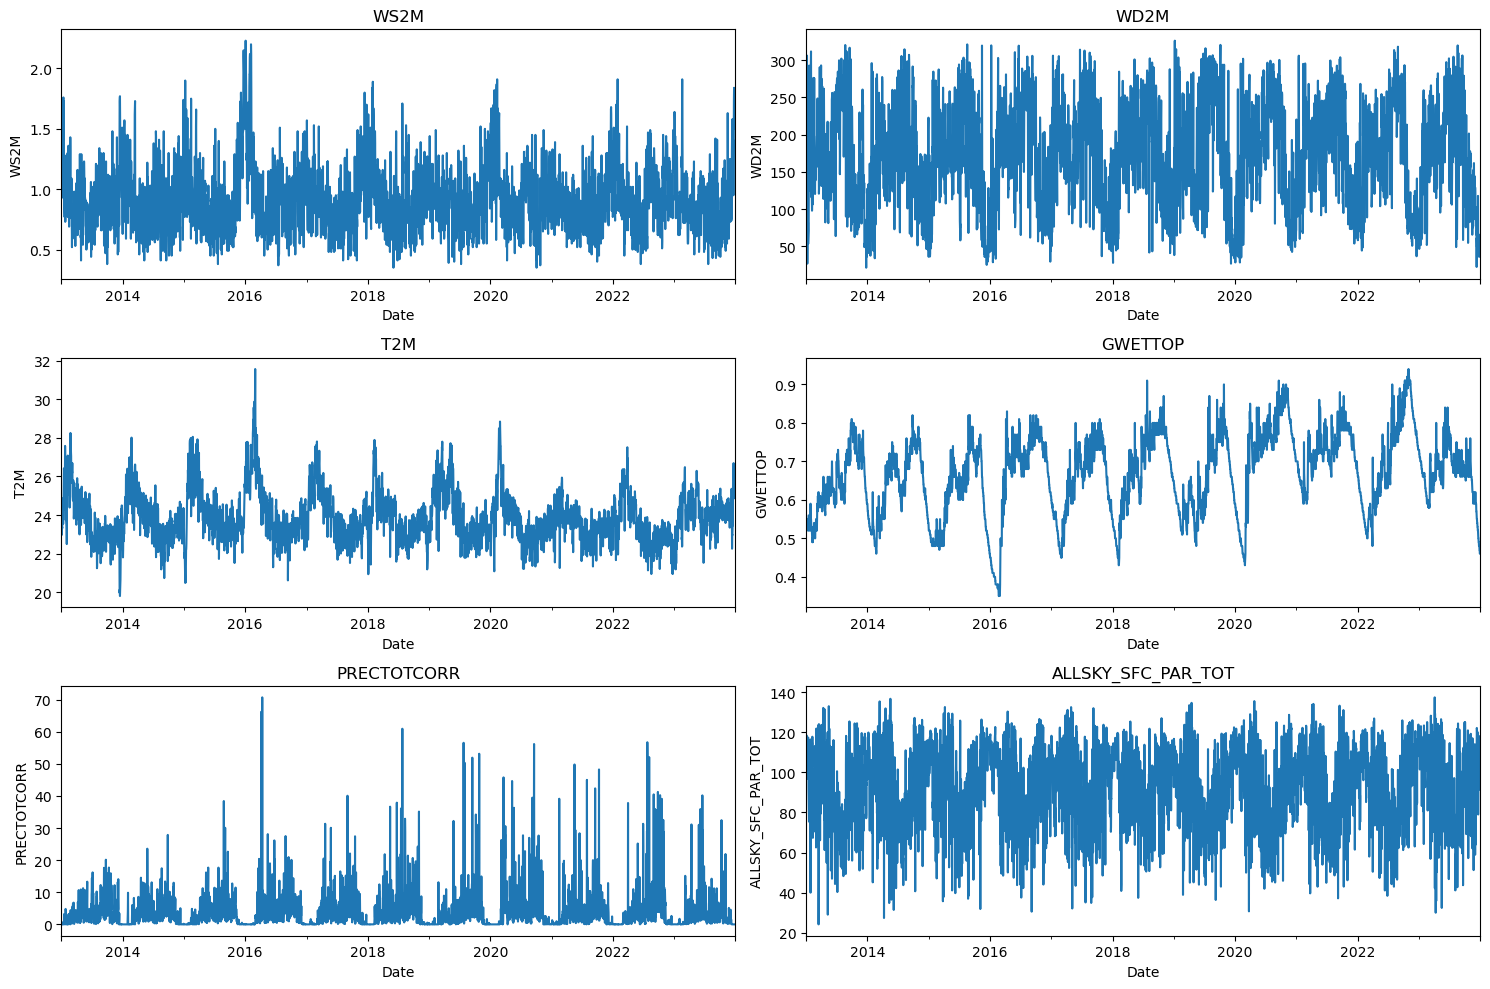

In [29]:
# Définir la taille de la figure
figsize(15, 10)

# Créer des sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Liste des colonnes
columns = df.columns

# Tracer chaque variable
for i, ax in enumerate(axes.flatten()):
    df[columns[i]].plot(ax=ax, title=columns[i])
    ax.set_xlabel('Date')
    ax.set_ylabel(columns[i])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

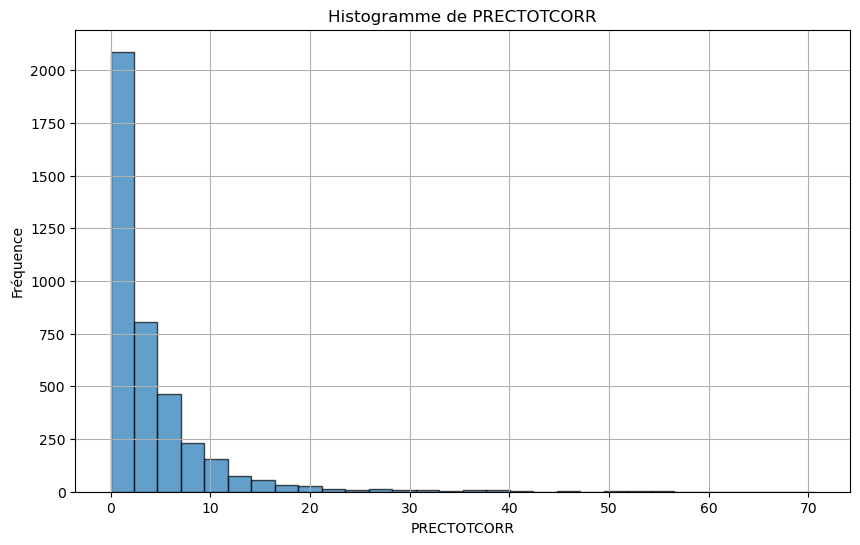

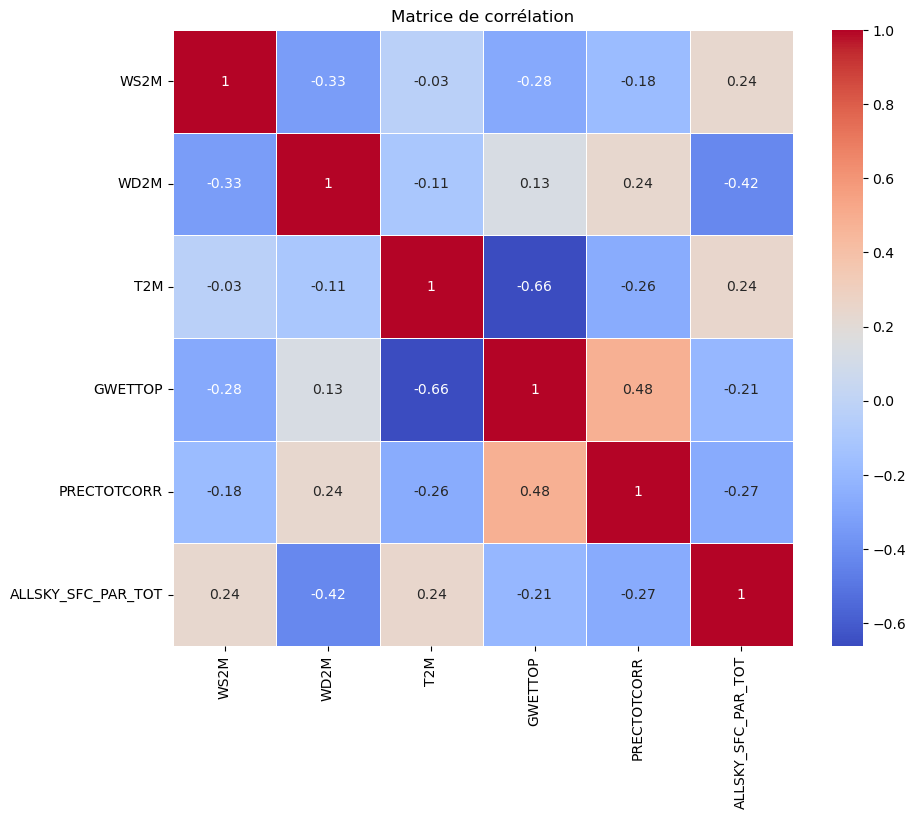

In [31]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Prétraitement des données

## Renommer les colonnes
je renomme les colonnes pour une bonne compréhension de mes données climatiques

In [37]:
df.rename(columns={
    'WS2M': 'vitesse_vent',
    'WD2M': 'direction_vent',
    'T2M': 'temperature',
    'GWETTOP': 'humidite',
    'PRECTOTCORR': 'precipitation',
    'ALLSKY_SFC_PAR_TOT': 'rayonnement_solaire'
}, inplace=True)

df.head(10)

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
date,,,,,,
2013-01-01,1.24,58.31,23.40,0.56,0.06,109.10
2013-01-02,1.41,49.75,22.98,0.56,0.02,115.24
2013-01-03,1.48,67.56,22.97,0.55,0.00,118.47
2013-01-04,1.26,102.69,23.21,0.55,0.00,99.50
2013-01-05,0.93,249.50,23.38,0.55,0.02,109.19
2013-01-06,0.98,306.19,23.32,0.55,0.58,101.45
2013-01-07,0.95,125.31,24.09,0.55,0.61,97.85
2013-01-08,1.15,26.88,24.86,0.55,0.16,96.95
2013-01-09,1.55,60.81,24.03,0.54,0.00,116.49


## Recherche des valeurs manquantes
ici nous allons chercher les valeurs manquantes si on trouve on les remplace par des nouvelles valeurs

In [38]:





# cherchons les valeurs manquantes
df.isnull().sum()

vitesse_vent           0
direction_vent         0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
dtype: int64

## Remplaçons les données manquantes
ici nous avos aucune données manquantes 

## Diviser l'ensemble de données en données d'entraînement et de test

Dimension du train data:  (3213, 6)
Dimension du test data:  (804, 6)


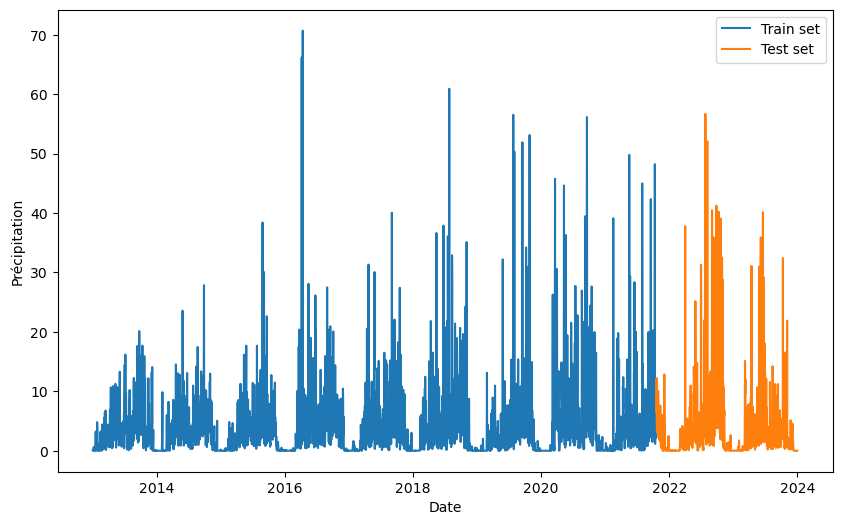

In [39]:






train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.precipitation)
plt.plot(test_dataset.precipitation)
plt.xlabel('Date')
plt.ylabel('Précipitation')
plt.legend(['Train set', 'Test set'], loc='upper right')
#plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/2.jpg', format='jpg', dpi=1000)

print('Dimension du train data: ',train_dataset.shape)
print('Dimension du test data: ', test_dataset.shape)




## Séparer la variable cible et les variables dépendantes
precipitation est la variable cible (sortie) et est une fonction des variables dépendantes (entrée) ; vitesse_vent, direction_vent, humidite, temperature, rayonnement solaire 

In [41]:





# Split train data to X and y
X_train = train_dataset.drop('precipitation', axis = 1)
y_train = train_dataset.loc[:,['precipitation']]

# Split test data to X and y
X_test = test_dataset.drop('precipitation', axis = 1)
y_test = test_dataset.loc[:,['precipitation']]
print('Dimension de X_train: ',X_train.shape)
print('Dimension de y_train: ', y_train.shape)
print('Dimension de X_test: ',X_test.shape)
print('Dimension de y_test: ', y_test.shape)

Dimension de X_train:  (3213, 5)
Dimension de y_train:  (3213, 1)
Dimension de X_test:  (804, 5)
Dimension de y_test:  (804, 1)


## Transformation des données
Une bonne règle empirique est que les données normalisées conduisent à de meilleures performances dans les réseaux neuronaux. Dans ce projet, j'utilise **MinMaxScaler** de sklearn. 

Je définis des scalers différents pour l'entrée et la sortie car ils ont des formes différentes. Ceci est particulièrement important pour l'utilisation de la fonction de transformation inverse.

* Dimension de X_train:  (3213, 5)
* Dimension de y_train:  (3213, 1)
* Dimension de X_test:  (804, 5)
* Dimension de y_test:  (804, 1)

Il est important de s'assurer que l'échelle de la variable de sortie est comprise entre 0 et 1 pour correspondre à l'échelle de la fonction d'activation (tanh) sur la couche de sortie de LSTM, GRU et BiLSTM. De plus, il est préférable que les variables d'entrée soient de petites valeurs, probablement comprises entre 0 et 1.

Quelles sont les étapes ?
- Ajuster le scaler à l'aide des données d'entraînement disponibles (cela signifie que les valeurs minimales et maximales observables sont estimées à l'aide des données d'entraînement.)

- Appliquer le scaler aux données d'entraînement

- Appliquer le scaler aux données de test

Il est important de noter que nous devons mettre à l'échelle les données invisibles avec le scaler ajusté sur les données d'entraînement.

In [42]:






# Transformation de  X_train, y_train, X_test et y_test

# Different scaler pour les entrées et les sorties
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# separer les données en utilisant le train date disponible pour la normalisation
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Application du scaler aux données train data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# appliquer les scalers aux données test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)


## Créer un jeu de données d'entrée 3D
LSTM, GRU et BiLSTM prennent une entrée 3D (num_samples, num_timesteps, num_features). Je crée donc une fonction d'assistance, *create_dataset*, pour remodeler l'entrée.

Dans ce projet, je définis time_steps = 30. Cela signifie que le modèle fait des prédictions basées sur les données des 30 derniers jours (dans la première itération de la boucle for, l'entrée porte les 30 premiers jours et la sortie est UWC le 30e jour).

In [43]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (774, 30, 5)
y_train.shape:  (3183, 1)
X_test.shape:  (774, 30, 5)
y_test.shape:  (3183, 1)


# Créer un modèle BiLSTM, LSTM et GRU, LSTM-GRU
La première fonction, create_model_bilstm, crée un BDLSM et obtient le nombre d'unités (neurones) dans les couches cachées. La deuxième fonction, *create_model*, obtient deux entrées : le nombre d'unités dans les couches cachées et le nom du modèle (LSTM ou GRU et LSTM-GRU).

Par souci de simplicité, BiLSTM, LSTM GRU et LSTM-GRU ont 2 couches cachées comprenant 64 neurones et 1 neurone dans la couche de sortie.

Pour rendre les réseaux LSTM  GRU et LSTM-GRU robustes aux changements, la fonction Dropout est utilisée. Dropout(0.2) supprime aléatoirement 20 % des unités du réseau.

In [46]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# Create LSTM-GRU model
def create_model_lstmgru(units, m,n):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.3)) 
    # Second layer of GRU
    model.add(n (units = units))                 
    model.add(Dropout(0.3))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model



# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU LSTM  et LSTM-GRU
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)
model_lstm_gru = create_model_lstmgru(64, LSTM, GRU)

model_gru.summary()
model_lstm.summary()
model_lstm_gru.summary()
model_bilstm.summary()


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 30, 64)         │        13,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,009 (199.25 KB)

 Trainable params: 51,009 (199.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,945 (167.75 KB)

 Trainable params: 42,945 (167.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 30, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,785 (526.50 KB)

 Trainable params: 134,785 (526.50 KB)

 Non-trainable params: 0 (0.00 B)

## Entrainner les modèles
J'entraîne le modèle avec des données d'entraînement pour 100 époques et batch_size = 32. Je fais en sorte que le modèle utilise 20 % des données d'entraînement comme données de validation. Il est important de définir shuffle = False car l'ordre des données est important dans notre projet.

Pour éviter le sur-apprentissage, je définis un arrêt précoce pour arrêter l'entraînement lorsque « val_loss » ne s'est pas amélioré après 10 époques (patience = 10).

In [48]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)
history_lstmgru = fit_model(model_lstm_gru)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0036 - val_loss: 0.0104
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0032 - val_loss: 0.0104
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0032 - val_loss: 0.0106
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0032 - val_loss: 0.0104
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0033 - val_loss: 0.0105
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0033 - val_loss: 0.0105
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0033 - val_loss: 0.0105
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0033 - val_loss: 0.0105
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0032 - val_loss: 0.0104
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/ste

# Graphique de d'entrainnement et de test

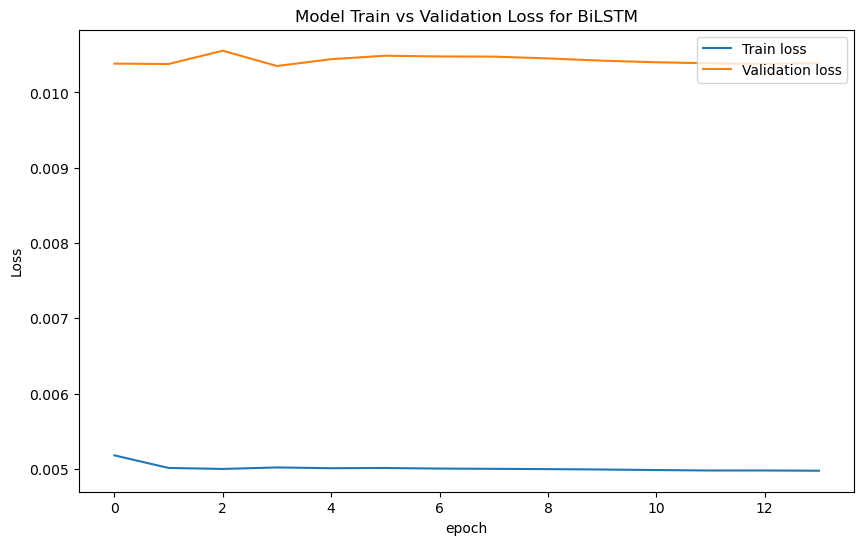

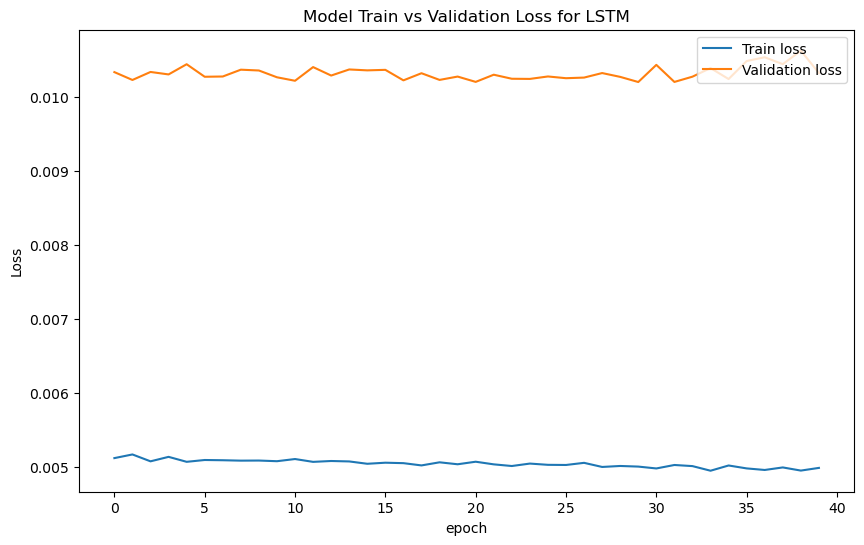

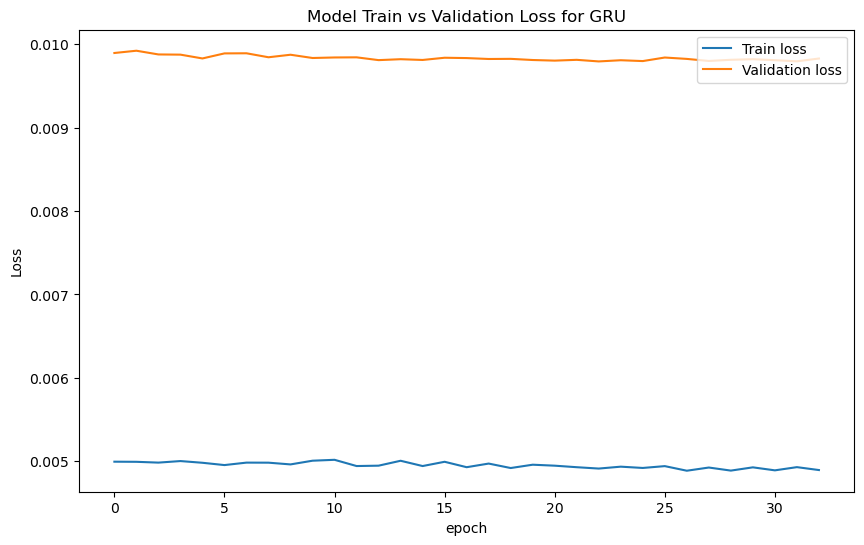

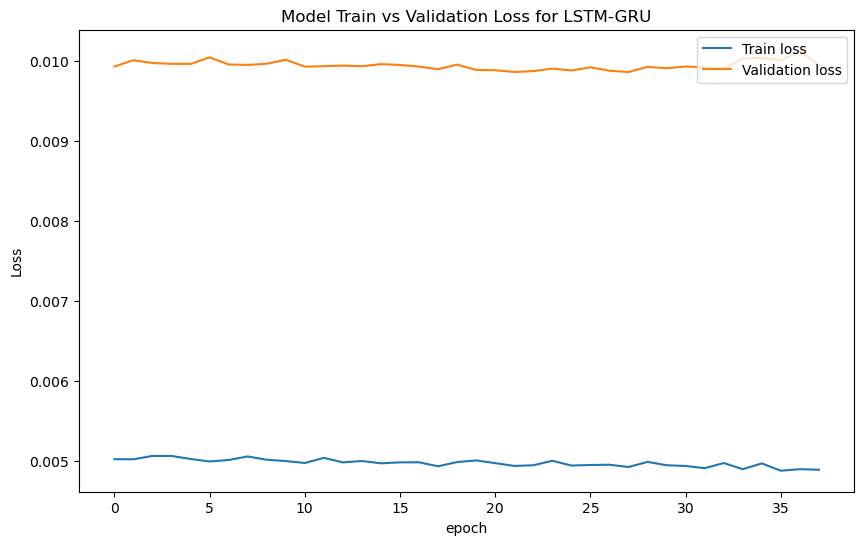

In [50]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')
plot_loss (history_lstmgru, 'LSTM-GRU')

# prediction du bilstm, lstm, gru et lstm-gru

In [51]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)
prediction_lstmgru = prediction(model_lstm_gru)

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step


# Graphique des valeur réel et les  valeurs prédicte 


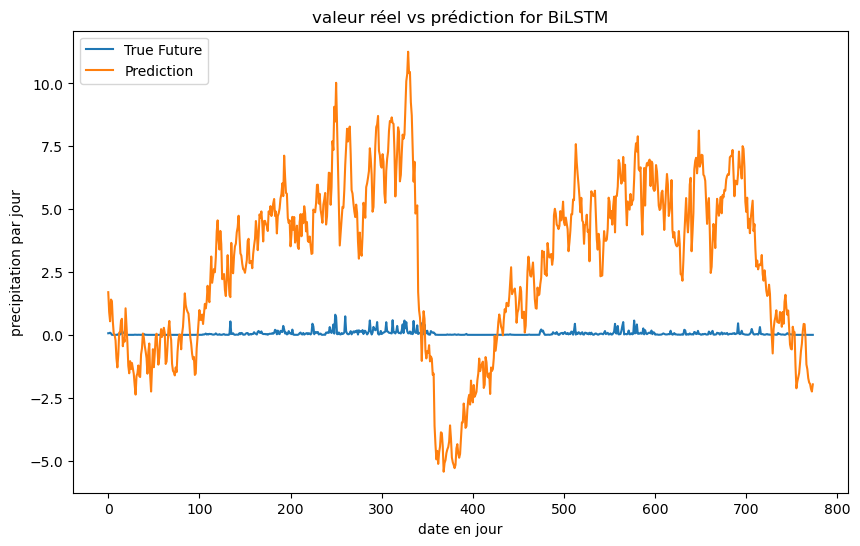

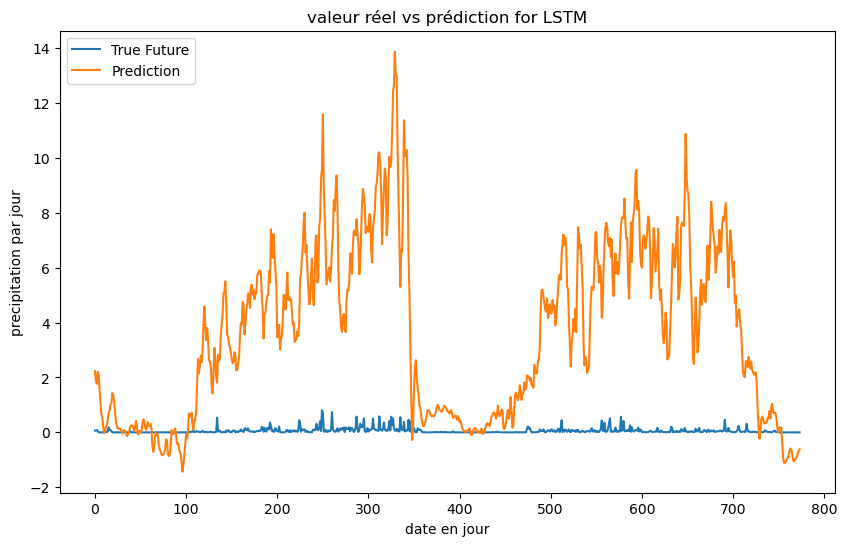

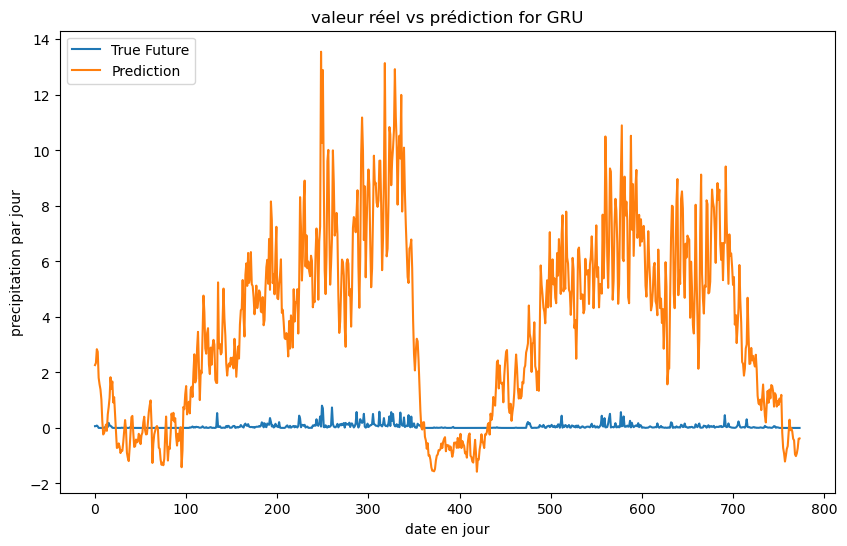

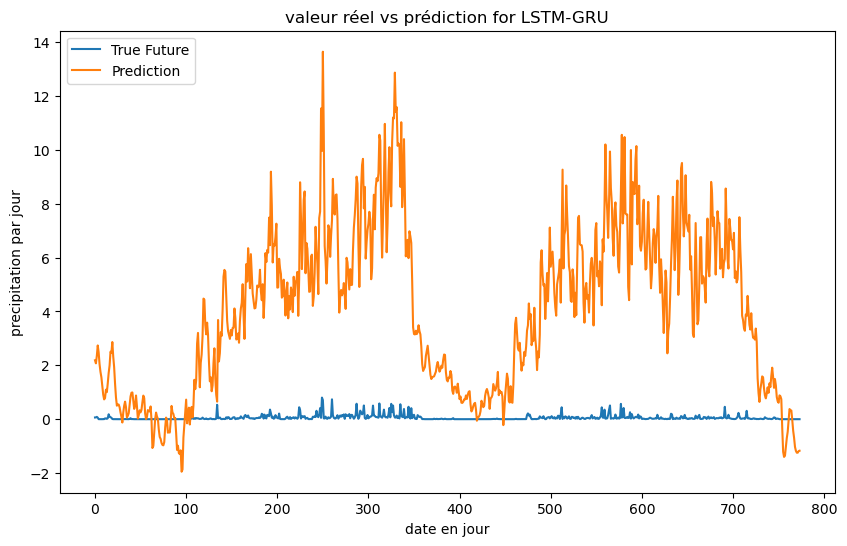

In [53]:







def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('valeur réel vs prédiction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('date en jour')
    plt.ylabel('precipitation par jour')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_lstmgru, 'LSTM-GRU', y_test)

# Calcul de la RSME et la MAE

In [54]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_lstmgru, y_test, 'LSTM-GRU')

Bidirectional LSTM:
Mean Absolute Error: 3.6452
Root Mean Square Error: 4.3122

LSTM:
Mean Absolute Error: 3.6803
Root Mean Square Error: 4.7236

GRU:
Mean Absolute Error: 3.8493
Root Mean Square Error: 4.8076

LSTM-GRU:
Mean Absolute Error: 4.0966
Root Mean Square Error: 4.9858



# Prévision de la consommation d'eau dans 10 ans


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


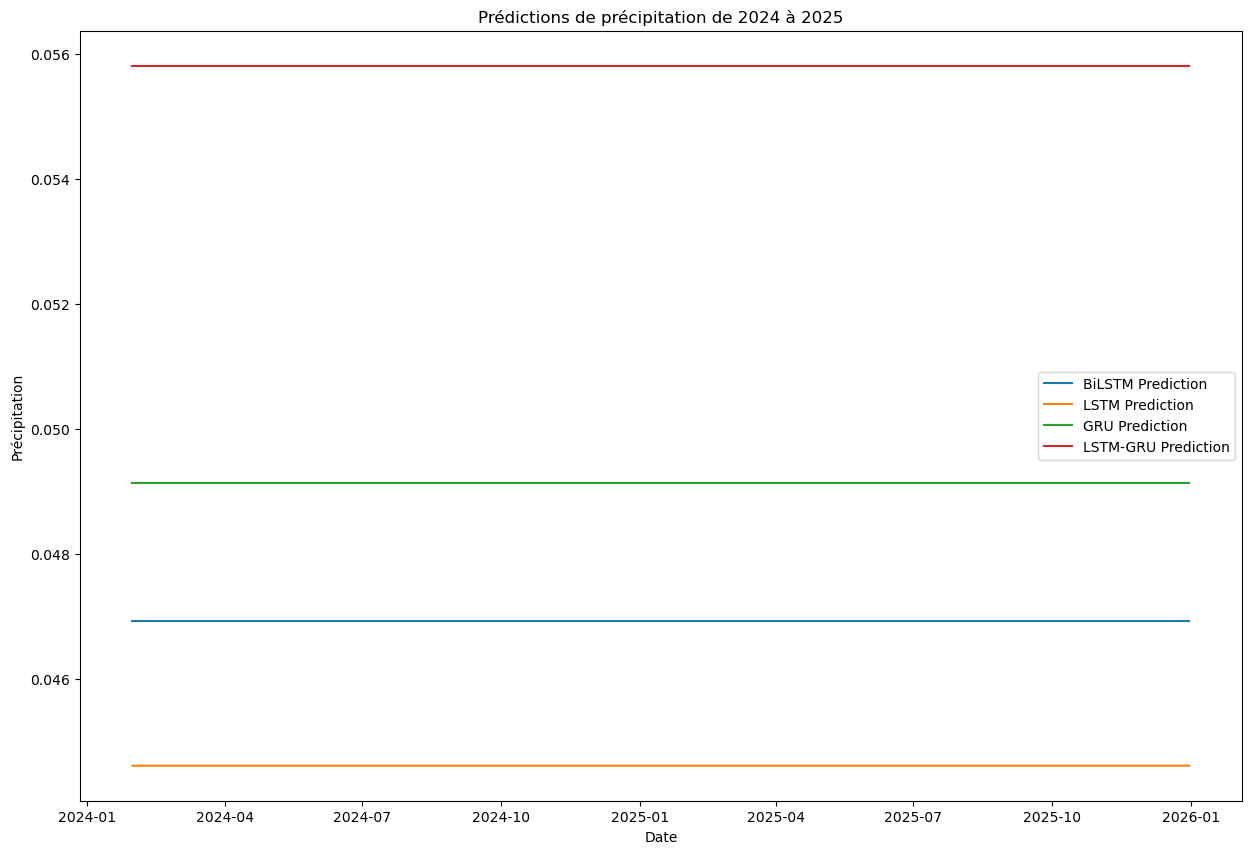

In [61]:
# Définir une fonction de prédiction si nécessaire
def prediction(model, X_future):
    return model.predict(X_future)

# Faire des prédictions avec chaque modèle
future_prediction_bilstm = prediction(model_bilstm, X_future).flatten()
future_prediction_lstm = prediction(model_lstm, X_future).flatten()
future_prediction_gru = prediction(model_gru, X_future).flatten()
future_prediction_lstmgru = prediction(model_lstm_gru, X_future).flatten()

# Ajouter les prédictions au DataFrame des futures données
future_data['precipitation_bilstm'] = np.nan
future_data['precipitation_lstm'] = np.nan
future_data['precipitation_gru'] = np.nan
future_data['precipitation_lstmgru'] = np.nan

future_data.iloc[TIME_STEPS:, future_data.columns.get_loc('precipitation_bilstm')] = future_prediction_bilstm
future_data.iloc[TIME_STEPS:, future_data.columns.get_loc('precipitation_lstm')] = future_prediction_lstm
future_data.iloc[TIME_STEPS:, future_data.columns.get_loc('precipitation_gru')] = future_prediction_gru
future_data.iloc[TIME_STEPS:, future_data.columns.get_loc('precipitation_lstmgru')] = future_prediction_lstmgru

# Afficher les prédictions
plt.figure(figsize=(15, 10))
plt.plot(future_data.index, future_data['precipitation_bilstm'], label='BiLSTM Prediction')
plt.plot(future_data.index, future_data['precipitation_lstm'], label='LSTM Prediction')
plt.plot(future_data.index, future_data['precipitation_gru'], label='GRU Prediction')
plt.plot(future_data.index, future_data['precipitation_lstmgru'], label='LSTM-GRU Prediction')
plt.xlabel('Date')
plt.ylabel('Précipitation')
plt.title('Prédictions de précipitation de 2024 à 2025')
plt.legend()
plt.show()
